In [1]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.3, random_state=42)

In [4]:
y_train

array([1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2,
       0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1,
       2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2,
       2, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [5]:
mergings = linkage(X_train, method='complete')

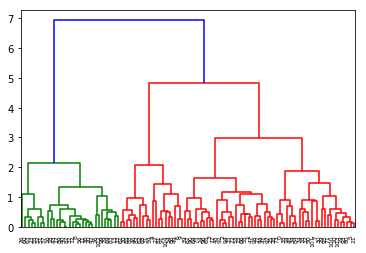

In [6]:
dendrogram(mergings, leaf_rotation=90, leaf_font_size=6)
plt.show()

In [7]:
from scipy.cluster.hierarchy import fcluster 

In [8]:
labels = fcluster(mergings, 4, criterion='distance')

In [9]:
print(labels)

[3 3 3 3 2 3 2 3 1 2 3 1 1 1 3 3 1 1 1 3 1 3 2 1 3 3 1 3 3 3 3 2 3 1 3 3 1
 1 3 3 1 3 1 1 3 3 2 3 3 2 3 1 1 3 2 1 1 1 3 2 1 2 2 1 3 3 3 3 2 1 2 3 3 3
 3 3 1 3 3 1 3 2 2 1 3 2 2 1 2 1 3 2 3 3 3 3 3 3 3 1 3 3 1 3 2]


In [10]:
pairs = pd.DataFrame({'labels':labels, 'species':y_train})

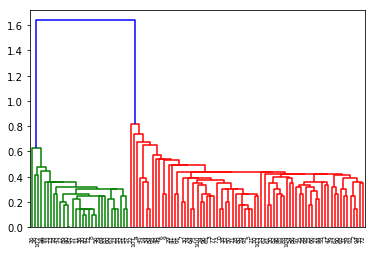

In [11]:
mergings = linkage(X_train, method='single')
dendrogram(mergings, leaf_rotation=90, leaf_font_size=6)
plt.show()

In [21]:
# single linkage vs. complete linkage
# with n data samples there are (n-1) merges in a hierarchical clustering
# number of clusters depends on the cluster distance in hierarchical clustering

In [44]:
from sklearn.manifold import TSNE

In [51]:
model = TSNE(learning_rate=75)
transformed = model.fit_transform(X_train)

In [52]:
xs = transformed[:,0]
ys = transformed[:,1]

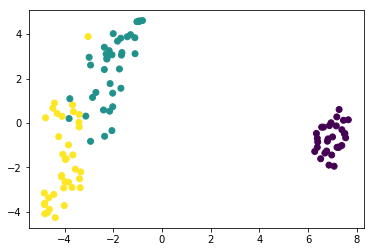

In [53]:
plt.scatter(xs,ys,c=y_train)
plt.show()

In [68]:
from sklearn.decomposition import PCA
from scipy.stats import pearsonr

In [80]:
model = PCA()
model.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [70]:
transformed = model.fit_transform(X_train)

In [71]:
print(model.components_)

[[ 0.37198422 -0.05942522  0.85508557  0.35626541]
 [ 0.66769242  0.71014442 -0.19829157 -0.10277252]
 [-0.55280234  0.61473995  0.04972469  0.56038542]
 [-0.33200021  0.33802121  0.47648355 -0.740595  ]]


In [72]:
xs = X_train[:,0]
ys = X_train[:,2]

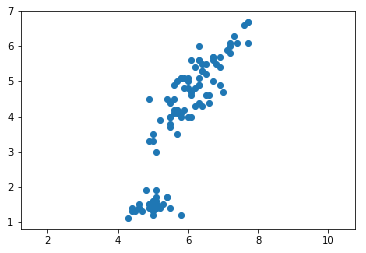

In [73]:
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

In [74]:
correlation, pvalue = pearsonr(xs, ys)
print(correlation)

0.866880399942


In [76]:
xs = transformed[:,0]
ys = transformed[:,2]

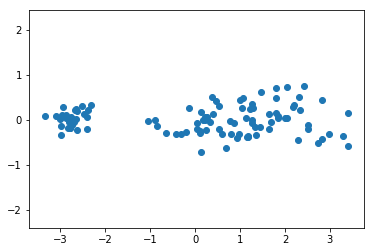

In [77]:
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

In [78]:
correlation, pvalue = pearsonr(xs, ys)
print(correlation)

1.6187963318e-16


In [83]:
#plotting the variance of PCA features

pca = PCA()
pca.fit(X_train)
features = range(pca.n_components_)

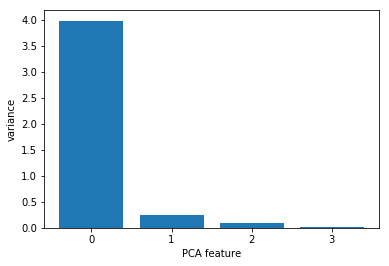

In [85]:
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

In [86]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

In [88]:
pca = PCA(n_components=2)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [89]:
transformed = pca.transform(X_train)
print(transformed.shape)

(105, 2)


In [90]:
xs = transformed[:,0]
ys = transformed[:,1]

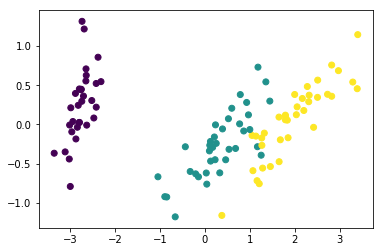

In [91]:
plt.scatter(xs,ys,c=y_train)
plt.show()